In [1]:
# 📌 Install required libraries (if not already installed)
!pip install numpy pandas scikit-learn matplotlib seaborn --quiet

In [12]:
# 📌 Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import StandardScaler

In [14]:
np.random.seed(42)
n_samples = 1000

transactions = pd.DataFrame({
    "Transaction_ID": range(n_samples),
    "Amount": np.random.normal(loc=500, scale=200, size=n_samples),  # Normal transaction amounts
    "Transaction_Time": np.random.randint(1, 24, n_samples),  # Hour of the day
    "Transaction_Type": np.random.choice(["Wire Transfer", "Cash Deposit", "Online Purchase", "Crypto Exchange"], n_samples)
})

In [15]:
transactions.head()

,Transaction_ID,Amount,Transaction_Time,Transaction_Type
0,0,599.342831,23,Online Purchase
1,1,472.347140,12,Wire Transfer
2,2,629.537708,17,Online Purchase
3,3,804.605971,8,Wire Transfer
4,4,453.169325,11,Online Purchase


In [16]:
# 📌 One-Hot Encode Transaction Type
transactions = pd.get_dummies(transactions, columns=["Transaction_Type"])

# 📌 Feature Scaling for LOF
scaler = StandardScaler()
scaled_features = scaler.fit_transform(transactions.drop(columns=["Transaction_ID"]))
transactions_scaled = pd.DataFrame(scaled_features, columns=transactions.drop(columns=["Transaction_ID"]).columns)

# 📌 Apply Isolation Forest for Anomaly Detection
iso_forest = IsolationForest(contamination=0.05, random_state=42)
transactions["Iso_Anomaly"] = iso_forest.fit_predict(transactions_scaled)

# 📌 Apply Local Outlier Factor (LOF)
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
transactions["LOF_Anomaly"] = lof.fit_predict(transactions_scaled)

# 📌 Convert Anomaly Labels (-1 = Anomaly, 1 = Normal)
transactions["Iso_Anomaly"] = transactions["Iso_Anomaly"].apply(lambda x: "Anomaly" if x == -1 else "Normal")
transactions["LOF_Anomaly"] = transactions["LOF_Anomaly"].apply(lambda x: "Anomaly" if x == -1 else "Normal")

# 📌 Compare Anomalies Detected by Both Methods
transactions["Disagreement"] = transactions["Iso_Anomaly"] != transactions["LOF_Anomaly"]

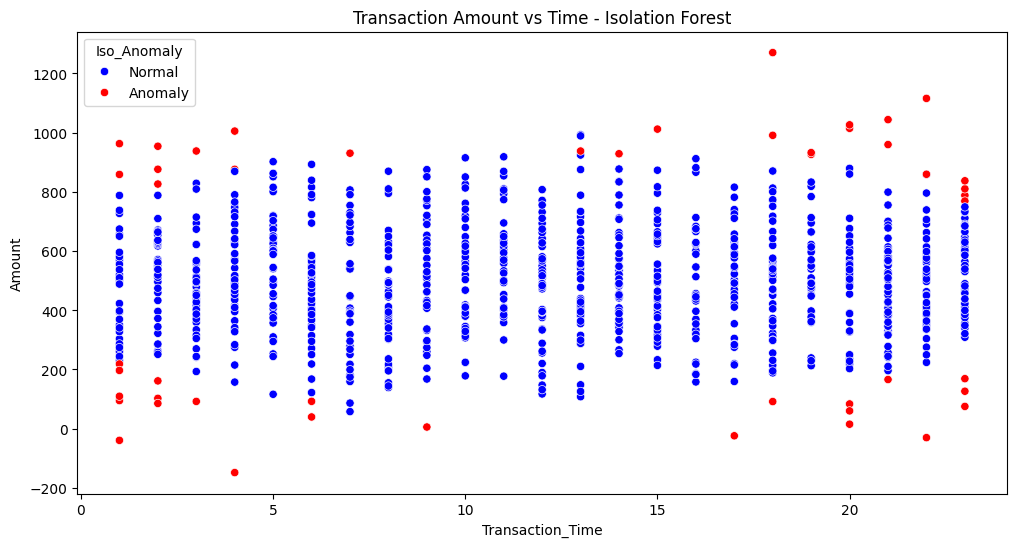

In [17]:
# 📌 Visualize Anomalies using Scatter Plot
plt.figure(figsize=(12, 6))
sns.scatterplot(data=transactions, x="Transaction_Time", y="Amount", hue="Iso_Anomaly", palette={"Anomaly": "red", "Normal": "blue"})
plt.title("Transaction Amount vs Time - Isolation Forest")
plt.show()

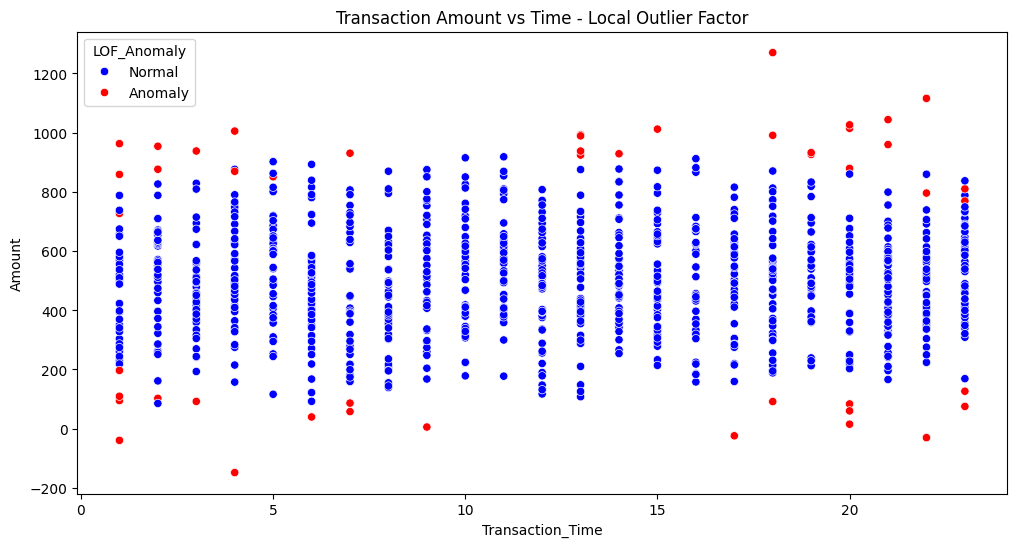

In [18]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=transactions, x="Transaction_Time", y="Amount", hue="LOF_Anomaly", palette={"Anomaly": "red", "Normal": "blue"})
plt.title("Transaction Amount vs Time - Local Outlier Factor")
plt.show()

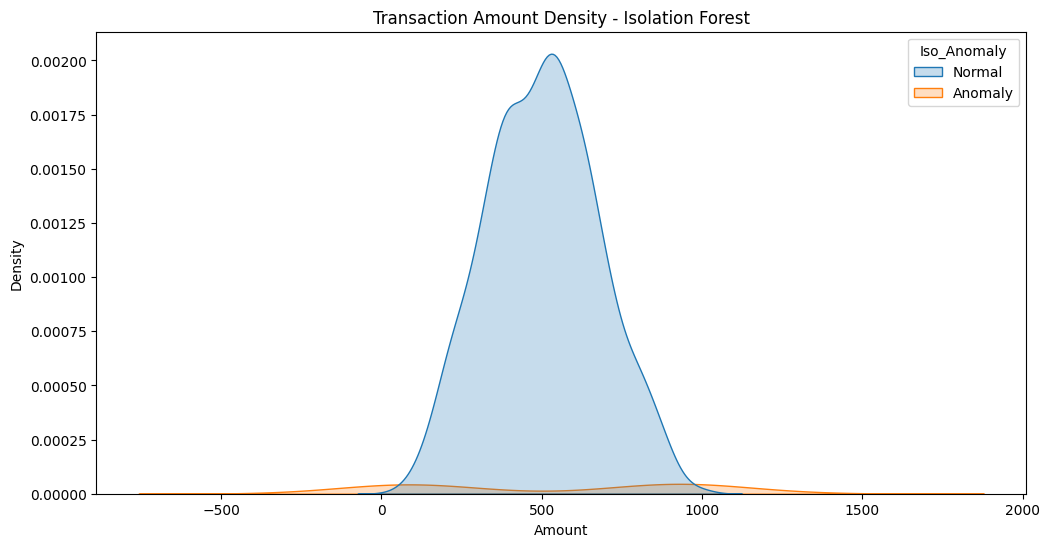

In [20]:
# 📌 KDE Plot for Anomaly Distribution
plt.figure(figsize=(12, 6))
sns.kdeplot(data=transactions, x="Amount", hue="Iso_Anomaly", fill=True)
plt.title("Transaction Amount Density - Isolation Forest")
plt.show()


In [21]:
# 📌 Display Flagged Anomalies
flagged = transactions[(transactions["Iso_Anomaly"] == "Anomaly") | (transactions["LOF_Anomaly"] == "Anomaly")]
print("\n🚨 Suspicious Transactions Detected 🚨")
print(flagged[["Transaction_ID", "Amount", "Transaction_Time", "Iso_Anomaly", "LOF_Anomaly", "Disagreement"]])


🚨 Suspicious Transactions Detected 🚨
     Transaction_ID      Amount  Transaction_Time Iso_Anomaly LOF_Anomaly  \
63               63  260.758675                 1     Anomaly     Anomaly   
74               74  -23.949021                17     Anomaly     Anomaly   
79               79  102.486217                 2     Anomaly     Anomaly   
113             113  992.648422                13      Normal     Anomaly   
125             125  938.091125                 3     Anomaly     Anomaly   
..              ...         ...               ...         ...         ...   
933             933   60.238809                20     Anomaly     Anomaly   
944             944  869.327399                 4      Normal     Anomaly   
977             977   15.224135                20     Anomaly     Anomaly   
991             991   91.653026                18     Anomaly     Anomaly   
996             996  859.537305                22     Anomaly      Normal   

     Disagreement  
63          False

In [22]:


# 📌 Save results for further analysis
transactions.to_csv("anomaly_detection_results.csv", index=False)
print("\n✅ Results saved as 'anomaly_detection_results.csv'!")


✅ Results saved as 'anomaly_detection_results.csv'!
